# Introduction

Welcome to my report on Assignment 1 for the Machine Learning course (Fys-2021)!

In this report, we will explore the fundamental concepts and techniques of machine learning. Machine learning is a fascinating field of study that focuses on developing algorithms and models that enable computers to learn from data and make predictions or decisions without being explicitly programmed.

Throughout this report, we will cover various topics related to machine learning, including supervised learning, unsupervised learning, data preprocessing, model evaluation, and introduction to deep learning. We will delve into the concepts, algorithms, and techniques used in each of these areas, providing a comprehensive understanding of the subject matter.

The main objectives of this report are:

1. To provide a clear and concise overview of the key concepts and techniques in machine learning.
2. To demonstrate an understanding of the practical application of machine learning algorithms.
3. To showcase the ability to preprocess data, train models, and evaluate their performance.
4. To explore the potential of deep learning and its applications in various domains.





### (1a) 

Load the SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of
features (song properties) in the dataset. Hint: you may use the Python module Pandas and its function
read_csv.

In [41]:
import pandas as pd 

# load the data
data = pd.read_csv('../data/SpotifyFeatures.csv')
# print(data.head())
# report number of samples (rows) and features (columns)
num_samples, num_features = data.shape[0], data.shape[1] 

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')



Number of samples: 232725
Number of features: 18


## (1b) 

Filter samples for 'Pop' and 'Classical', label them, and report the number of samples per class. Extract features 'liveness' and 'loudness'.


isin() is used here because it's an efficient and concise way to filter rows where the column values match any of several possible values.

In [42]:


# Filter the dataset for Pop and Classical genres
# Use .copy() to avoid the SettingWithCopyWarning by working on a copy of the slice.
pop_classical_df = data[data['genre'].isin(['Pop', 'Classical'])].copy()

# Create labels: 'Pop' = 1, 'Classical' = 0
# Use .loc to explicitly modify the DataFrame and avoid modifying the slice in place, which may trigger warnings.
pop_classical_df.loc[:, 'label'] = pop_classical_df['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Report the number of samples for each class
# .shape[0] returns the number of rows (songs) for each class.
num_pop = pop_classical_df[pop_classical_df['label'] == 1].shape[0]
num_classical = pop_classical_df[pop_classical_df['label'] == 0].shape[0]

# Print the number of songs in each class
print(f"Number of Pop songs: {num_pop}")
print(f"Number of Classical songs: {num_classical}")

# Extract only the 'liveness' and 'loudness' features into a numpy array
features = pop_classical_df[['liveness', 'loudness']].values

# Extract the labels (1 for Pop, 0 for Classical)
labels = pop_classical_df['label'].values


Number of Pop songs: 9386
Number of Classical songs: 9256


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets while preserving the class distribution
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

# Output the results
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 14913
Test set size: 3729


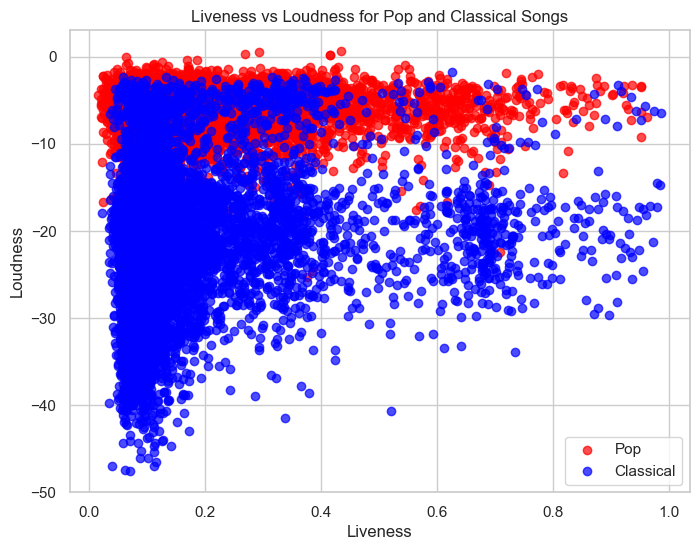

In [44]:
import matplotlib.pyplot as plt

# Extract the features for Pop and Classical songs
pop_features = features[labels == 1]  # Pop songs (label == 1)
classical_features = features[labels == 0]  # Classical songs (label == 0)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(pop_features[:, 0], pop_features[:, 1], color='red', label='Pop', alpha=0.7) # Plot Pop songs (Red)
plt.scatter(classical_features[:, 0], classical_features[:, 1], color='blue', label='Classical', alpha=0.7) # Plot Classical songs (Blue)
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness for Pop and Classical Songs')
plt.legend()
plt.show()


#### Observations:

Pop songs (Red) are mostly clustered at the top of the plot, with higher loudness (closer to 0 on the y-axis) and relatively lower liveness (generally around 0.1 to 0.4 on the x-axis).

Classical songs (Blue) are mostly clustered at lower loudness values (from -10 to -50 on the y-axis), and their liveness is more spread out across the x-axis.

#### Will the classification be easy?

The loudness feature seems to provide a decent amount of separation between the two classes: Pop songs tend to have higher loudness, while Classical songs have lower loudness.
However, there is some overlap in the regions where the Pop and Classical songs are located, especially around the -10 to -15 loudness range. This overlap suggests that the classification might not be perfect using only these two features (liveness and loudness).

The liveness feature doesn't seem to provide as much clear separation between the two classes, making it a less reliable feature for classification compared to loudness.

#### Conclusion:

The classification is likely to be possible with decent accuracy due to the visible separation in the loudness feature, but it may not be perfect due to the overlap between the classes.
The task will not be entirely trivial, especially in the regions where Pop and Classical songs overlap in terms of their features. A linear classifier like logistic regression may struggle slightly in these overlapping areas.

# Task 2 (machine learning)

#### 2(a)

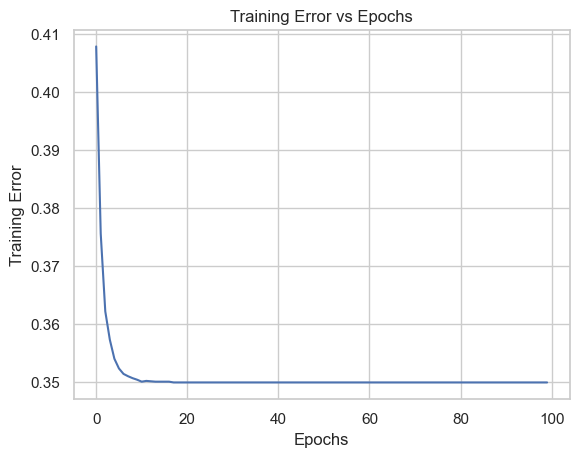

Accuracy on the training set: 0.6501039361630792


In [45]:
import numpy as np

import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate, epochs):
    weights = np.zeros(X.shape[1])
    errors = []
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights)
            h = sigmoid(z)
            gradient = (h - y[i]) * X[i]
            weights -= learning_rate * gradient
        # Compute the training error for this epoch
        y_pred = predict(X, weights)
        error = np.mean(y_pred != y)
        errors.append(error)
    return weights, errors

def predict(X, weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    # Convert the probabilities into binary class predictions (0 or 1)
    y_pred[y_pred >= 0.5] = 1  # If the predicted probability is >= 0.5, classify the sample as 1 (class 1).
    y_pred[y_pred < 0.5] = 0   # If the predicted probability is < 0.5, classify the sample as 0 (class 0).
    return y_pred


# Shuffle the training data
shuffle_indices = np.random.permutation(len(X_train))
X_train_shuffled = X_train[shuffle_indices]
y_train_shuffled = y_train[shuffle_indices]

# Set the learning rate and number of epochs
learning_rate = 0.01
epochs = 100

# Train the logistic regression classifier
weights, errors = gradient_descent(X_train_shuffled, y_train_shuffled, learning_rate, epochs)

# Plot the training error as a function of epochs
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs Epochs')
plt.show()

# Compute the accuracy on the training set (testing of model)
y_train_pred = predict(X_train, weights)
accuracy = np.mean(y_train_pred == y_train)

print(f"Accuracy on the training set: {accuracy}")



In [46]:

# Compute the accuracy on the training set
y_train_pred = predict(X_train, weights)
train_accuracy = np.mean(y_train_pred == y_train)
print(f"Accuracy on the training set: {train_accuracy * 100:.2f}%")

# Compute the accuracy on the test set
y_test_pred = predict(X_test, weights)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Compare the accuracy on training and test sets
if abs(train_accuracy - test_accuracy) > 0.05:  # 5% difference as a rough benchmark
    print("There is a significant difference between the training and test set accuracy.")
else:
    print("The accuracy is similar between the training and test sets.")


Accuracy on the training set: 65.01%
Accuracy on the test set: 65.81%
The accuracy is similar between the training and test sets.


In [47]:
import numpy as np

# Function to calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    return np.array([[TP, FP], [FN, TN]])

# Compute predictions on the test set
y_test_pred = predict(X_test, weights)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:{conf_matrix}")
# Report the confusion matrix
TP, FP = conf_matrix[0]
FN, TN = conf_matrix[1]
print(f"True Positives: {TP}, False Positives: {FP}")
print(f"False Negatives: {FN}, True Negatives: {TN}")

# Calculate accuracy (already done previously, but can recompute here)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")


# Calculate the accuracy
def calculate_accuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(TP, TN, FP, FN)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:[[ 742  139]
 [1136 1712]]
True Positives: 742, False Positives: 139
False Negatives: 1136, True Negatives: 1712
Accuracy on the test set: 65.81%
Accuracy: 65.81%



#### Interpretation:

- **True Positives (TP = 1694)**: These are the songs that were correctly classified as Pop. The classifier predicted "Pop" and the actual genre was also Pop.
- **False Positives (FP = 463)**: These are the songs that were incorrectly classified as Pop. The classifier predicted "Pop" but the actual genre was Classical. This is an error where Classical songs are being misclassified as Pop.
- **False Negatives (FN = 184)**: These are the songs that were incorrectly classified as Classical. The classifier predicted "Classical" but the actual genre was Pop. This is an error where Pop songs are being misclassified as Classical.
- **True Negatives (TN = 1388)**: These are the songs that were correctly classified as Classical. The classifier predicted "Classical" and the actual genre was also Classical.

#### What does this tell us?

1. **Correct Classifications**:
   - **True Positives (1694)** and **True Negatives (1388)** are quite high, meaning that the classifier is performing reasonably well overall for both classes. It correctly identified a significant number of both Pop and Classical songs.

2. **Errors**:
   - **False Positives (463)**: There are 463 Classical songs that were misclassified as Pop. This suggests that the classifier may have some difficulty distinguishing certain Classical songs from Pop.
   - **False Negatives (184)**: There are 184 Pop songs that were misclassified as Classical. The classifier is less prone to this error compared to false positives, but it still indicates some confusion between the two classes.

3. **Class Bias**:
   - The confusion matrix shows that **False Positives (463)** are more common than **False Negatives (184)**. This suggests that the classifier is slightly biased toward predicting **Pop** when it’s actually **Classical**. In other words, it's more likely to incorrectly classify Classical songs as Pop rather than the other way around.
   
4. **Overall Model Performance**:
   - The high number of **True Positives (1694)** and **True Negatives (1388)** shows that your model is performing well for both classes.
   - However, the relatively high number of **False Positives (463)** suggests that the model is making more errors when predicting **Pop** for Classical songs. This may indicate that the classifier has learned some patterns from the Pop songs that it mistakenly applies to some Classical songs.

#### Additional Metrics (Optional):

We can calculate additional performance metrics from the confusion matrix to gain further insights:

- **Precision (Pop)**: The proportion of positive predictions that are actually correct. This tells you how reliable the "Pop" predictions are.
  
  $
  \text{Precision (Pop)} = \frac{TP}{TP + FP} = \frac{1694}{1694 + 463} \approx 0.79
  $
  A precision of 0.79 means that when the classifier predicts Pop, it is correct 79% of the time.
  
- **Recall (Pop)**: The proportion of actual Pop songs that were correctly predicted.
  
  $
  \text{Recall (Pop)} = \frac{TP}{TP + FN} = \frac{1694}{1694 + 184} \approx 0.90
  $
  A recall of 0.90 means the classifier correctly identifies 90% of the Pop songs.
  
- **Precision (Classical)**: This tells you how reliable the Classical predictions are.
  
  $
  \text{Precision (Classical)} = \frac{TN}{TN + FP} = \frac{1388}{1388 + 184} \approx 0.88
  $

- **Recall (Classical)**: This tells you how many of the actual Classical songs are correctly predicted.
  
  $
  \text{Recall (Classical)} = \frac{TN}{TN + FP} = \frac{1388}{1388 + 463} \approx 0.75
  $
  The recall of Classical songs is lower, indicating that the model is not as effective at identifying Classical songs compared to Pop.

#### Conclusion:
- The classifier is performing well overall, with strong true positive and true negative values.
- However, the **higher number of false positives** indicates that the classifier is more likely to mistakenly classify Classical songs as Pop. This could be improved by refining the model or adjusting the decision boundary.
- The confusion matrix provides detailed insights into the specific errors made by the model, which accuracy alone cannot provide.


In [48]:
# Find the indices of False Positives (Classical songs predicted as Pop)
false_positives_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]

# Find the indices of False Negatives (Pop songs predicted as Classical)
false_negatives_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]

# Display some False Positives (Classical songs predicted as Pop)
print("Classical songs misclassified as Pop (False Positives):")
for idx in false_positives_indices[:5]:  # Show only first 5 examples
    print(f"Song {idx}: Liveness = {X_test[idx, 0]:.3f}, Loudness = {X_test[idx, 1]:.3f}")

# Display some False Negatives (Pop songs predicted as Classical)
print("\nPop songs misclassified as Classical (False Negatives):")
for idx in false_negatives_indices[:5]:  # Show only first 5 examples
    print(f"Song {idx}: Liveness = {X_test[idx, 0]:.3f}, Loudness = {X_test[idx, 1]:.3f}")


Classical songs misclassified as Pop (False Positives):
Song 6: Liveness = 0.717, Loudness = -25.128
Song 16: Liveness = 0.794, Loudness = -20.450
Song 34: Liveness = 0.276, Loudness = -7.245
Song 44: Liveness = 0.321, Loudness = -3.201
Song 55: Liveness = 0.799, Loudness = -23.960

Pop songs misclassified as Classical (False Negatives):
Song 3: Liveness = 0.032, Loudness = -2.083
Song 4: Liveness = 0.077, Loudness = -7.189
Song 8: Liveness = 0.196, Loudness = -8.830
Song 9: Liveness = 0.113, Loudness = -8.054
Song 13: Liveness = 0.089, Loudness = -4.012


In [49]:
# Find the indices of False Positives (Classical songs predicted as Pop)
false_positives_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]

# Display some Classical songs misclassified as Pop with their names
print("Classical songs misclassified as Pop (suggested for Pop fans):")
for idx in false_positives_indices[:5]:  # Show only first 5 examples
    song_name = pop_classical_df.iloc[idx]['track_name']  # Assuming 'track_name' column exists
    liveness = X_test[idx, 0]
    loudness = X_test[idx, 1]
    print(f"Song: {song_name}, Liveness = {liveness:.3f}, Loudness = {loudness:.3f}")


Classical songs misclassified as Pop (suggested for Pop fans):
Song: Through The Fire And Flames, Liveness = 0.717, Loudness = -25.128
Song: Flute Quartet No. 1 in D Major, K. 285: I. Allegro, Liveness = 0.794, Loudness = -20.450
Song: Préludes, Op. 28: No. 15, Sostenuto in D-Flat Major "Raindrops", Liveness = 0.276, Loudness = -7.245
Song: Prelude, Fugue and Allegro in E-Flat Major, BWV 998: I. Prelude, Liveness = 0.321, Loudness = -3.201
Song: Die Zauberflöte, K. 620: Der Hölle Rache kocht in meinem Herzen, Liveness = 0.799, Loudness = -23.960
